## NLP SPAM or HAM?

#### Application of NLP
- Text Classification
- Spam Filters
- Voice text messaging
- Sentiment analysis
- Spell or grammar check
- Chat bot
- Search Suggestion
- Search Autocorrect
- Automatic Review Analysis system
- Machine translation
- And so much more

- Natural Language Understanding (Text classification)

- Natural Language Generation (Text Generation)

# Spam Text Messages

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/spam.png" width="950">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv('spam.tsv', sep='\t')
df = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
len(df)

5572

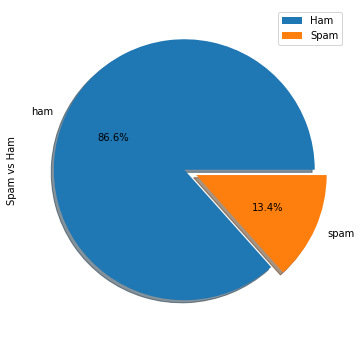

In [6]:
df['label'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

A lot of messages are actually not spam. About 86% of our dataset consists of normal messages.

While we split our data set into train and test or when we use cross validation, we will have to use stratified sampling, otherwise we have a chance of our training model being skewed towards normal messages. If the sample we choose to train our model consists majorly of normal messages, it may end up predicting everything as ham and we might not be able to figure this out since most of the messages we get are actually ham and will have a pretty good accuracy.

A very basic model would be a model that predicts everything as ham. It would have a decent accuracy. But then again, is that right? No. We will then have to use an accuracy metric that keeps this in mind. Goal : We don't mind if we miss the odd spam message but we surely don't want to mark a ham message as spam i.e Precision is very important. Hence we will use fbeta score as our accuracy metric with inclination towards Precision

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
spam_messages = df[df["label"] == "spam"]["message"]
ham_messages = df[df["label"] == "ham"]["message"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 
# This will also remove the not word in something like can't etc. 
# In a sentiment analysis setting, its better to use 
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

##Spam Word cloud

### SPAM

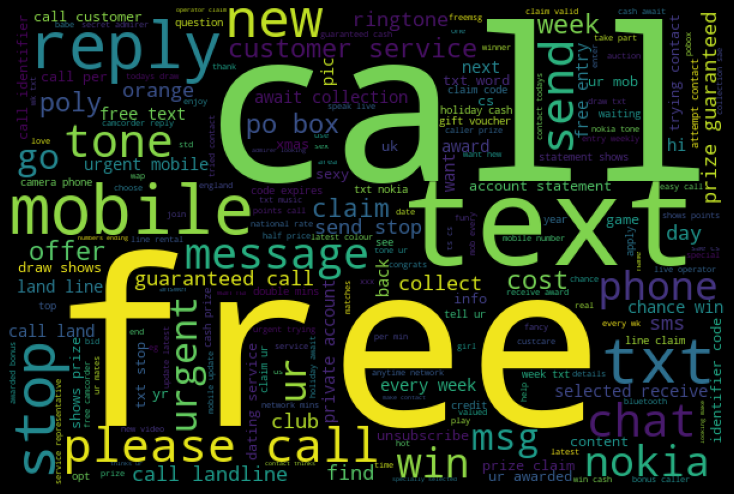

In [12]:
from wordcloud import WordCloud

spam_str = " ".join(spam_words)
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_str)
#spam_wordcloud = WordCloud(width=600, height=400).generate("Gli Usa pagheranno per il boicottaggio diplomatico delle Olimpiadi. Lo ha detto il portavoce del ministero degli Esteri cinese ")
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## HAM

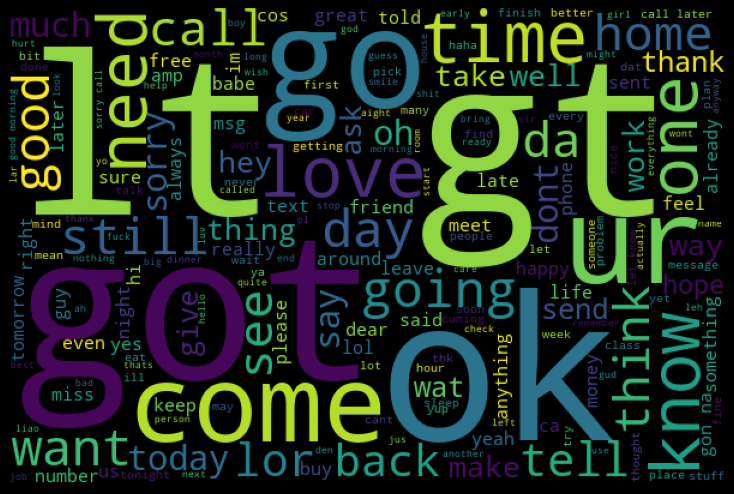

In [13]:
#Ham word cloud

ham_str = " ".join(ham_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_str)
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 Spam words are :



call      346
free      217
txt       156
u         145
ur        144
mobile    123
text      121
stop      118
claim     113
reply     104
dtype: int64

In [ ]:
# Top 10 Ham words

ham_words = np.array(ham_words)
print("Top 10 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 Ham words are :



u       991
gt      318
lt      316
get     302
go      249
ur      247
ok      247
got     245
know    235
like    233
dtype: int64

#### Balence this data 

In [16]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [17]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [18]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [19]:
ham = ham.sample(spam.shape[0])

In [20]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [21]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis 

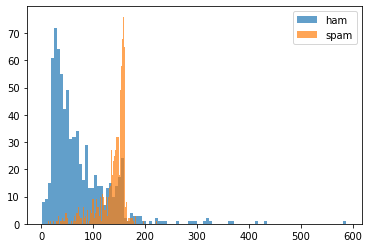

In [24]:
plt.hist(data[data['label']=='ham']['length'],label='ham', bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], label='spam',bins = 100, alpha = 0.7)
plt.legend()
plt.show()

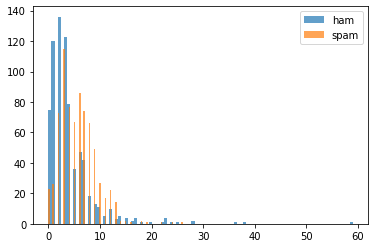

In [26]:
plt.hist(data[data['label']=='ham']['punct'],label='ham', bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'],label='spam', bins = 100, alpha = 0.7)
plt.legend()
plt.show()

### Data Preparation 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
data.head()

,label,message,length,punct
0,ham,Yeah my usual guy's out of town but there're d...,76,2
1,ham,Living is very simple.. Loving is also simple....,145,20
2,ham,Watching ajith film ah?,23,1
3,ham,"Short But Cute : "" Be a good person , but dont...",78,12
4,ham,I think if he rule tamilnadu..then its very to...,65,3


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                    test_size = 0.3, 
                                                    random_state=667,
                                                    shuffle = True, 
                                                    stratify=data['label']
                                                    )

In [ ]:
### Bag of Words Creation

In [32]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [33]:
X_train_vect.shape

(1045, 3826)

In [34]:
X_train_vect

<1045x3826 sparse matrix of type '<class 'numpy.float64'>'
	with 17932 stored elements in Compressed Sparse Row format>

In [ ]:
1045*3708

3874860

## NLP Pipeline

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/nlp/pipes.jpg" width="950">

### Pipeline with Random Forest Classifier

In [35]:
pipe1 = Pipeline([('tfidf', TfidfVectorizer()), 
                ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [36]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [37]:
y_pred = pipe1.predict(X_test)

In [38]:
confusion_matrix(y_test, y_pred)

array([[223,   1],
       [ 20, 205]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       224
        spam       1.00      0.91      0.95       225

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



In [40]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [41]:
pipe1.predict(["Hey, whassup?"])[0]

'ham'

In [42]:
pipe1.predict(["you have free won tickets to the USA  this summer."])[0]

'spam'

### Pipeline with SVM Classifier

In [43]:
pipe2 = Pipeline([('tfidf', TfidfVectorizer()), 
                ('clf', SVC(C = 1000, gamma = 'auto'))])

In [44]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [ ]:
y_pred = pipe2.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[223,   1],
       [ 20, 205]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       224
        spam       1.00      0.91      0.95       225

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



In [47]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [48]:
pipe2.predict(["Hey, whassup?"])[0]

'ham'

In [49]:
pipe2.predict(["you have got free tickets to the USA this summer."])[0]

'spam'